# Exercise 2: Data Processing and Analysis

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
try:
    from gofer.ok import check
except:
    %pip install git+https://github.com/grading/gradememaybe.git
    from gofer.ok import check

  Cloning https://github.com/grading/gradememaybe.git to /tmp/pip-req-build-j2wwq5bt
  Running command git clone --filter=blob:none --quiet https://github.com/grading/gradememaybe.git /tmp/pip-req-build-j2wwq5bt
  Resolved https://github.com/grading/gradememaybe.git to commit dc7226bde8410a8de9a2eb362a623069b6755f4c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


ImportError: IPython needs to be installed for notebook grading

Today we're working with simulated smartwatch health data. You'll notice when you read in the csv file that we have 7 columns: User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, and Stress Level. We're going to go through and "clean up" the data so that we can calculate some basic statistics such as mean, median, minimum, and maximum for each variable. Run the cell below to read in the table saving it in the variable `smartwatch`. 

In [9]:
smartwatch = pd.read_csv("unclean_smartwatch_health_data.csv")
print(smartwatch)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
1         NaN               NaN               98.532195    727.601610   
2      1860.0        247.803052               97.052954   2826.521994   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
...       ...               ...                     ...           ...   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9998   4907.0               NaN               98.401058   3364.788855   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
1      

Let's start together with the Heart Rate column. Just looking at the preview table above we can see two things right away: (1) we have `NaN` values meaning data was not collected for those individuals, and (2) some of the heart rate values are abnormally high i.e. `247.803052`. Let's see what the entire range of values look like. 

In [10]:
print(smartwatch['Heart Rate (BPM)'].min(), smartwatch['Heart Rate (BPM)'].max())

40.0 296.5939695131042


**Question 1**: Set the variables below equal to the minimum heart rate and the maximum heart rate in the dataset. This is just practice for the method of checking answers as you go. Afterwards run the cell below to check your answer. 

In [11]:
minimumHeartRate = smartwatch['Heart Rate (BPM)'].min()
maximumHeartRate = smartwatch['Heart Rate (BPM)'].max()

In [12]:
check('tests/q1.py')

NameError: name 'check' is not defined

Notice that the maximum value of `296` beats per minimute is WAY above normal range of heart rates. In fact, according to [heart.org](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) the highest estimated heart rate based on age ranges from 150 to 200 for adults. This will vary between individuals, but this is a good starting point for us to think about outliers in the heart rate values in this dataset. Let's see how many rows have missing data or heart rates above 200. 

In [13]:
## select rows where Heart Rate is NaN or rows where the heart rate is above 200. 
# Emphasis on the usage of 'or' here, we want rows where either 
# scenario 1 (NaN) OR scenario 2 (>200) is true. 

outlierHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'] > 200]
nullHeartRaterows = smartwatch[smartwatch['Heart Rate (BPM)'].isnull()]

print(len(outlierHeartRaterows) + len(nullHeartRaterows))

450


In [14]:
## Now let's get a table of all the other rows. 
heartrateRows = smartwatch[(~smartwatch['Heart Rate (BPM)'].isnull()) & (smartwatch['Heart Rate (BPM)'] <= 200)]

print(heartrateRows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
3      2294.0         40.000000               96.894213  13797.338044   
4      2130.0         61.950165               98.583797  15679.067648   
5      2095.0         96.285938               94.202910  10205.992256   
6      4772.0         47.272257               95.389760   3208.781177   
...       ...               ...                     ...           ...   
9994   1942.0         77.912299               98.640583  10061.145291   
9995   1524.0         78.819386               98.931927   2948.491953   
9996   4879.0         48.632659               95.773035   4725.623070   
9997   2624.0         73.834442               97.945874   2571.492060   
9999   4113.0         70.063864               98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
0         7.167235622316564  Highly Active            1  
3      

**Question 2:** 

Notice here that the length of the two tables (`450` and `9550`) add up to the total number rows (`n=10000`). This is a good sanity check as we manipulate the table. Now we have to decide how we deal with these missing values and outliers. One method to do this would be remove all the rows with null values or outlier values. Another method is use imputation - this can be done in several ways but below we're going to substitute the average heart rate for the missing and mismeasured values. Do we think this will change the mean?

In [15]:
HeartRateMean = heartrateRows['Heart Rate (BPM)'].mean() # find hr mean
print(HeartRateMean)

75.13268404820141


In [16]:
outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean # impose mean onto hr bpm column for values 
nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean # that are outliers or null


print(outlierHeartRaterows)
print(nullHeartRaterows)

      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
2      1860.0         75.132684               97.052954   2826.521994   
337    2369.0         75.132684               95.441773   2998.761919   
393    2443.0         75.132684               95.497181   1227.804688   
403    3200.0         75.132684               96.011492   9402.746140   
595    2129.0         75.132684               97.161853   2555.402184   
649    2008.0         75.132684               98.356789   2739.171166   
818    3156.0         75.132684                     NaN   7281.778831   
1195   3261.0         75.132684               99.652006   2867.872064   
1391   4621.0         75.132684               96.688083  20577.677290   
1602   4737.0         75.132684               95.095839  16072.283561   
2023      NaN         75.132684               99.032130  17620.765455   
2211   2711.0         75.132684               97.852781   1786.998129   
2212   4020.0         75.132684               95.28

/tmp/ipykernel_79662/2581598007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlierHeartRaterows['Heart Rate (BPM)'] = HeartRateMean # impose mean onto hr bpm column for values
/tmp/ipykernel_79662/2581598007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullHeartRaterows['Heart Rate (BPM)'] = HeartRateMean # that are outliers or null


In [17]:
smartwatch_hr = pd.concat([outlierHeartRaterows, nullHeartRaterows, heartrateRows]) # concatenate outliers, nulls, and hr
# outliers and null are usable for hr column now

fullTableHRMean = smartwatch_hr['Heart Rate (BPM)'].mean()
print(fullTableHRMean)

75.13268404820141


In [ ]:
check('tests/q2.py')

Notice how the mean doesn't change when you use the imputed mean as the substituted values. However, as a note this will change the distribution of values and has the potential to obscure the causes of missing values or outliers. 

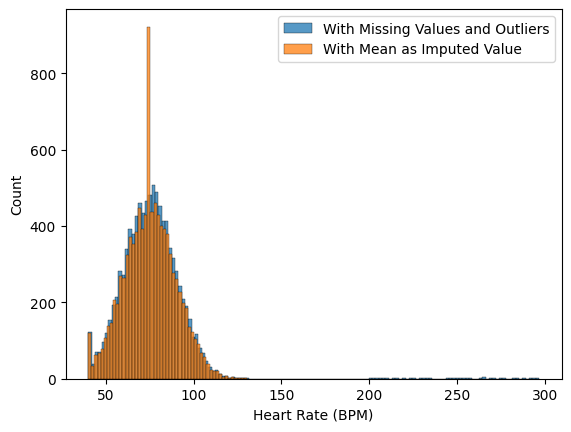

In [22]:
sns.histplot(smartwatch['Heart Rate (BPM)'], label ='With Missing Values and Outliers')
sns.histplot(smartwatch_hr['Heart Rate (BPM)'], label = 'With Mean as Imputed Value')
plt.legend()

**Question 3**: How does the imputation method affect the median values?  Remember the table `smartwatch` remains unchanged and can be used to find the original median value. 

ANSWER: The mean imputation only slightly changes the median, with a difference of -0.04. This makes sense as the median is a robust statistic and is less sensitive to the presence of outliers.


In [23]:
## coding cell to check the difference in median values 

med_1 = smartwatch['Heart Rate (BPM)'].median()
med_2 = smartwatch_hr['Heart Rate (BPM)'].median()

print("The change in median is " + str(med_2 - med_1))


The change in median is -0.08791720955503024


Now let's repeat this process for the other columns as well. 

**Question 4**: Find the minimum, maximum, and mean Blood Oxygen Level. 

In [24]:
minBloodO2 = smartwatch['Blood Oxygen Level (%)'].min()

maxBloodO2 = smartwatch['Blood Oxygen Level (%)'].max()

meanBloodO2 = smartwatch['Blood Oxygen Level (%)'].mean()

print(minBloodO2, maxBloodO2, meanBloodO2)

90.79120814564097 100.0 97.84158102099076


In [ ]:
check('tests/q4.py')

KeyError: 'image/svg+xml'

We can do some visualizations using a box plot to better decide if there's any outliers we'd like to remove. Maybe you decide that everything below 92.5 is an outlier should be removed or maybe you decide to keep all of the values or maybe you decide to remove all values under 94% since that falls outside of a normal, healthy range according to doctors (I would not suggest this last one as it would obscure quite a bit of data! But some analysts might consider it!). In question 5, you can make that decision and justify your answer. 

<Axes: ylabel='Blood Oxygen Level (%)'>

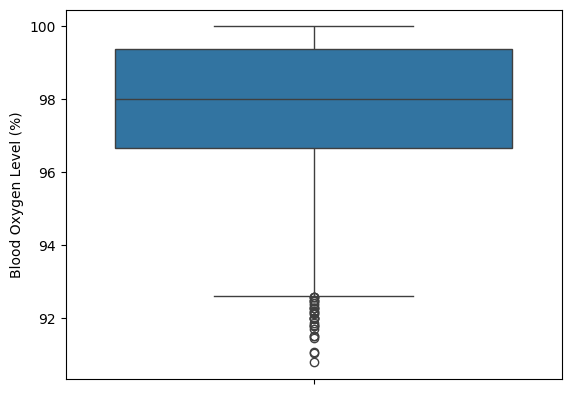

In [25]:
sns.boxplot(smartwatch['Blood Oxygen Level (%)'])

**Question 5**: Decide how you want to deal with missing and outlier values in the Blood Oxygen Level column. Set your final table equal to the variable `smartwatch_o2`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_o2 = smartwatch_hr`

ANSWER: I plan on using mean imputation to replace missing values since this will not have a significant effect on the median and the range for O2 saturation is quite small. For outliers, I plan on rounding to the nearest possible value (i.e. O2 saturation > 100 will be rounded to 100, O2 saturation < 80 will be rounded to 80). I'm making this choice because the min and max fall within a very close range and in general there is a small range for safe/healthy O2 saturation values. smartwatches might be calibrated differently because of this tight range and have errors from time to time in reporting accurate values, so this way we can still consider differences in extremity of values within the context of possible ranges. It is possible people go to the hospital with their watches on, so < 90  values are reasonable as long as they are above 80

In [26]:
# check for outliers and null values
outlierO2rows = smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'] > 100] & smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'] < 80] 
# can't have blood O2 > 100 (%) or < 92 (dead)
nullO2rows = smartwatch_hr[smartwatch_hr['Blood Oxygen Level (%)'].isnull()]

# checking these values
outlierO2rows, nullO2rows

# there are no outliers, but there are empty entries: 
O2Rows = smartwatch_hr[(~smartwatch_hr['Blood Oxygen Level (%)'].isnull())] # list of all other rows

# find mean
O2_mean = O2Rows['Blood Oxygen Level (%)'].mean()

# impute mean
nullO2rows['Blood Oxygen Level (%)'] = O2_mean

# concatenate
smartwatch_o2 = pd.concat([outlierO2rows, nullO2rows, O2Rows])

# check
print(smartwatch_o2)

     User ID Heart Rate (BPM) Blood Oxygen Level (%)    Step Count  \
818   3156.0        75.132684              97.841581   7281.778831   
8369  2283.0        75.132684              97.841581  21495.639335   
1615  1417.0        75.132684              97.841581   1585.892722   
1712  4079.0        75.132684              97.841581  19003.921284   
4690  2829.0        75.132684              97.841581   6610.794796   
...      ...              ...                    ...           ...   
9994  1942.0        77.912299              98.640583  10061.145291   
9995  1524.0        78.819386              98.931927   2948.491953   
9996  4879.0        48.632659              95.773035    4725.62307   
9997  2624.0        73.834442              97.945874    2571.49206   
9999  4113.0        70.063864              98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
818       4.300171191258864      Sedentary            3  
8369      5.291653956497481  Highly_Active 

/tmp/ipykernel_79662/2383010037.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullO2rows['Blood Oxygen Level (%)'] = O2_mean


Moving onto the Step Count column. 

**Question 6**: Find the minimum, maximum, and mean step counts. 

In [27]:
minSteps = smartwatch_o2['Step Count'].min()

maxSteps = smartwatch_o2['Step Count'].max()

meanSteps = smartwatch_o2['Step Count'].mean()

print(minSteps, maxSteps, meanSteps)

# check how many outliers
print(len(smartwatch_o2[smartwatch_o2['Step Count']<5])) # too small
print(len(smartwatch_o2[smartwatch_o2['Step Count']>30000])) #too big

# what do they look like?
#print(smartwatch_o2[smartwatch_o2['Step Count']<5]) # too small
print(smartwatch_o2[smartwatch_o2['Step Count']>30000]['Activity Level']) #too big

0.9101380609604088 62486.690753464914 6985.685884992238
6
122
4186    Highly_Active
4185              NaN
825        Seddentary
836     Highly Active
1066           Active
            ...      
9648       Seddentary
9664        Sedentary
9743       Seddentary
9943           Active
9973           Active
Name: Activity Level, Length: 122, dtype: object


In [ ]:
check('tests/q6.py')

**Question 7**: Decide how you want to deal with missing and outlier values in the Steps column. Set your final table equal to the variable `smartwatch_steps`. Use the space below to explain your decisions. 

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_steps = smartwatch_o2`

ANSWER: There seem to be some extreme outliers in this dataset. For example, 0.91 represents that the person had an average of 1 step per day -- they likely left their watch at home and didn't wear it. Conversely, the maximum has near 62,000 steps averaged per day, which is crazy (on most people's most active days, they'll walk 25k steps). This person might be a pro athlete or someone who bounces their leg/arm, which the watch registers as steps.

I'm going to look at how many outliers there are in each direction. It seems like there are only a few who have < 5 steps per day (I chose this cutoff value to account for those who might have difficulty moving), so I plan on using mean imputation to get those in a valid range.

There are a larger number of people who have a large (> 40k) number of daily steps. If "Activity Level" was better organized, I would keep all observations that rate themselves active or highly active and have many daily steps, while using mean imputation on those who have many daily steps but slef report as sedentary. This is because I assume if someone self-reports as active or very active, high numbers of steps are less likely to be outliers. Since that column is a mess though, I'm just going to do mean imputation on all high outliers.

....

In [28]:
# separate into outliers, nulls, and normals
outlierSteps = pd.concat([smartwatch_o2[smartwatch_o2['Step Count']<5],smartwatch_o2[smartwatch_o2['Step Count']>30000]])
nullSteps = smartwatch_o2[(smartwatch_o2['Step Count'].isnull())]
norm_steps = smartwatch_o2[(smartwatch_o2['Step Count']>=5) & (smartwatch_o2['Step Count']<= 30000) & (~smartwatch_o2['Step Count'].isnull())]

# find means of normals
step_mean = norm_steps['Step Count'].mean()

# impute mean
outlierSteps['Step Count'] = step_mean
nullSteps['Step Count'] = step_mean

# put together into new df
smartwatch_steps = pd.concat([outlierSteps, nullSteps, norm_steps])
print(smartwatch_steps)

     User ID Heart Rate (BPM) Blood Oxygen Level (%)    Step Count  \
2349  3126.0        75.132684              98.348774   6614.340486   
908   1823.0        70.061523               97.28198   6614.340486   
3470  4631.0        87.045706              95.438054   6614.340486   
5816  3873.0         67.21311                  100.0   6614.340486   
7489  1366.0        45.719594              99.576891   6614.340486   
...      ...              ...                    ...           ...   
9994  1942.0        77.912299              98.640583  10061.145291   
9995  1524.0        78.819386              98.931927   2948.491953   
9996  4879.0        48.632659              95.773035    4725.62307   
9997  2624.0        73.834442              97.945874    2571.49206   
9999  4113.0        70.063864              98.475606    544.696104   

     Sleep Duration (hours) Activity Level Stress Level  
2349      9.306370985176311  Highly_Active            1  
908       2.494171838826327          Actve 

/tmp/ipykernel_79662/1557573478.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullSteps['Step Count'] = step_mean


Next onto the Sleep Duration column. 

**Question 8**: Try finding the minimum number of hours slept among participants. 

In [29]:
minSleep = smartwatch_steps['Sleep Duration (hours)'].min()

TypeError: '<=' not supported between instances of 'str' and 'float'

In the error message, you should see the phrase: 

`TypeError: '<=' not supported between instances of 'str' and 'float'`

This means that the column is a combination of multiple data types. If you recall, we discussed computer readable data that columns HAVE to contain just a single data type. Having a combination of strings, characters, and numbers in a column will only cause more issues downstream. Let's try to figure out all the instances of non-numerical values in the column. 

First let's try to identify all the non-numerical values to make sure removing them doesn't obscure any important information. 

In [30]:
for i in smartwatch['Sleep Duration (hours)'].unique():  ## Loop through each unique item in the column
    try:
        numericVal = float(i)  ## first try to see if it can be converted to a number
    except:
        print(i)  ## if it can't be converted print it to screen 

ERROR


So, we find that the only non-numerical value is the string `ERROR`. We can fix this in two ways. First let's try fixing it by splitting the tables like we've done previously. 

In [31]:
errorTable = smartwatch_steps[smartwatch_steps['Sleep Duration (hours)'] == 'ERROR']
print(errorTable)

     User ID Heart Rate (BPM) Blood Oxygen Level (%)   Step Count  \
9943  2961.0        91.834863              96.145378  6614.340486   
8642  3476.0        75.132684              99.462778  6614.340486   
1456  2997.0         54.11658              95.631824  6614.340486   
4349  2677.0        73.357223              95.335209  6614.340486   
6992  2105.0        97.477048              94.138582  6614.340486   
...      ...              ...                    ...          ...   
9843  1213.0        52.006299              97.110356   215.187641   
9901  2269.0        63.369107              96.229029  6656.786482   
9912  2074.0        75.933666              97.386073  1813.072248   
9927  3007.0        87.579045              98.768633  3727.161872   
9951  3104.0        70.335328              98.560133  1997.442874   

     Sleep Duration (hours) Activity Level Stress Level  
9943                  ERROR         Active            4  
8642                  ERROR         Active            3

Observe that we've created a table with the rows with `ERROR` in the sleep duration column. We can now replace with the `ERROR` value with our handy NaN value for doing numerical statistics. 

In [32]:
errorTable['Sleep Duration (hours)'] = np.nan

errorTable

/tmp/ipykernel_79662/2302362292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errorTable['Sleep Duration (hours)'] = np.nan


,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
9943,2961.0,91.834863,96.145378,6614.340486,NaN,Active,4
8642,3476.0,75.132684,99.462778,6614.340486,NaN,Active,3
1456,2997.0,54.11658,95.631824,6614.340486,NaN,Active,1
4349,2677.0,73.357223,95.335209,6614.340486,NaN,Sedentary,1
6992,2105.0,97.477048,94.138582,6614.340486,NaN,Seddentary,7
...,...,...,...,...,...,...,...
9843,1213.0,52.006299,97.110356,215.187641,NaN,Seddentary,6
9901,2269.0,63.369107,96.229029,6656.786482,NaN,Active,4
9912,2074.0,75.933666,97.386073,1813.072248,NaN,Sedentary,10
9927,3007.0,87.579045,98.768633,3727.161872,NaN,Active,1


Now we could go through and put the tables back together, but another method to do this is to use a built-in function to pandas called `pd.to_numeric()`. Let's try that. 

In [33]:
## create a copy of the table 
smartwatch_sleep = smartwatch_steps

smartwatch_sleep['Sleep Duration (hours)'] = pd.to_numeric(smartwatch_sleep['Sleep Duration (hours)'], errors='coerce')

smartwatch_sleep

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count,Sleep Duration (hours),Activity Level,Stress Level
2349,3126.0,75.132684,98.348774,6614.340486,9.306371,Highly_Active,1
908,1823.0,70.061523,97.28198,6614.340486,2.494172,Actve,5
3470,4631.0,87.045706,95.438054,6614.340486,6.886368,Highly_Active,2
5816,3873.0,67.21311,100.0,6614.340486,4.480539,Sedentary,9
7489,1366.0,45.719594,99.576891,6614.340486,NaN,Actve,1
...,...,...,...,...,...,...,...
9994,1942.0,77.912299,98.640583,10061.145291,5.428635,Seddentary,10
9995,1524.0,78.819386,98.931927,2948.491953,7.402749,Active,7
9996,4879.0,48.632659,95.773035,4725.62307,6.382166,Sedentary,2
9997,2624.0,73.834442,97.945874,2571.49206,6.916549,Sedentary,4


Now we can finish **Question 8** and find the minimum, maximum, and mean of the sleep duration column. 

In [34]:
minSleep = smartwatch_steps['Sleep Duration (hours)'].min()

maxSleep = smartwatch_steps['Sleep Duration (hours)'].max()

meanSleep = smartwatch_steps['Sleep Duration (hours)'].mean()

print(minSleep, maxSleep, meanSleep)

-0.1944527906201543 12.140232872862926 6.505462918406444


In [ ]:
check('tests/q8.py')

**Question 9**: Decide how you want to deal with missing and outlier values in the sleep column. Set your final table equal to the variable `smartwatch_updated_sleep`. Use the space below to explain your decisions. 

*Remember to start with the `smartwatch_sleep` table that we just created.*

Notes: Refer to [this article](https://pmc.ncbi.nlm.nih.gov/articles/PMC5548942/) on methods of handling these type of instances in data. Keep in mind, you might find that either there are no missing values or no outliers. That's okay, just indicate that in the written space below and update the table i.e. `smartwatch_updated_sleep = smartwatch_sleep`

ANSWER: I see the minimum value is -0.19, which is not possible (hours cannot be negative) and the largest value is 12, which is reasonable. The mean is also what I would expect. For any values below 0, I'll do mean imputation and assume that this came from an error in measuring sleep. There is also the question of how to deal with # of hours between 0 - 3, since that's unlikely to be the average for a whole week (people need more sleep than that to live). However I'm going to leave those lwoer values alone because it could tell us about shortcomings in the watch to measure sleep for different groups of people, ex those with higher sleeping heart rates, those who take naps, or who wake up often during sleeping hours. 

....

In [35]:
# separate into outliers, nulls, and normals
outlierSleep = pd.concat([smartwatch_steps[smartwatch_steps['Sleep Duration (hours)']<0],smartwatch_steps[smartwatch_steps['Sleep Duration (hours)']>24]])
nullSleep = smartwatch_steps[(smartwatch_steps['Sleep Duration (hours)'].isnull())]
norm_sleep = smartwatch_steps[(smartwatch_steps['Sleep Duration (hours)']>=0) & (smartwatch_steps['Sleep Duration (hours)']<= 24) & (~smartwatch_steps['Sleep Duration (hours)'].isnull())]

# find means of normals
sleep_mean = norm_sleep['Sleep Duration (hours)'].mean()

# impute mean
outlierSleep['Sleep Duration (hours)'] = sleep_mean
nullSleep['Sleep Duration (hours)'] = sleep_mean

# put together into new df
smartwatch_updated_sleep = pd.concat([outlierSleep, nullSleep, norm_sleep])
print(smartwatch_updated_sleep)

     User ID Heart Rate (BPM) Blood Oxygen Level (%)    Step Count  \
3366  1608.0        78.832837                  100.0   7122.866517   
7489  1366.0        45.719594              99.576891   6614.340486   
5245  3915.0        72.252959              97.675192   6614.340486   
9943  2961.0        91.834863              96.145378   6614.340486   
8642  3476.0        75.132684              99.462778   6614.340486   
...      ...              ...                    ...           ...   
9994  1942.0        77.912299              98.640583  10061.145291   
9995  1524.0        78.819386              98.931927   2948.491953   
9996  4879.0        48.632659              95.773035    4725.62307   
9997  2624.0        73.834442              97.945874    2571.49206   
9999  4113.0        70.063864              98.475606    544.696104   

      Sleep Duration (hours) Activity Level Stress Level  
3366                6.506161      Sedentary           10  
7489                6.506161          Act

/tmp/ipykernel_79662/1199756884.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nullSleep['Sleep Duration (hours)'] = sleep_mean


We're going to skip the `Activity Level` column for a minute and look at the `Stress Level` column. If we try getting the minimum, we'll find the same error as in the Sleep column where we have mixed data types (strings and numerical values). Let's use the same type of loop to make sure we don't obscure any data by forcing the strings to NaN values. 

In [36]:
for item in smartwatch_updated_sleep['Stress Level'].unique():
    try:
        int(item)
    except:
        print(item)

Very High
nan


**Question 10**: 

What might you decide to do to deal with the `Very High` value? 

Go ahead and do so below and give a brief case for doing so here. Assign your table to the variable `smartwatch_stress`. 

ANSWER: It looks like stress level is measured from 1-10, so I'll replace "Very High" with 10. This is ssuming 1 is low and 10 is high, which might not be true but it makes the most intuitive sense.
...

In [37]:
## cell to deal with 'Very High' value
smartwatch_stress = smartwatch_updated_sleep[smartwatch_updated_sleep['Stress Level'] == 'Very High']

# replace with 10
smartwatch_stress['Stress Level'] = 10

# checking
print(smartwatch_stress)


     User ID Heart Rate (BPM) Blood Oxygen Level (%)    Step Count  \
1700  1777.0        63.996994              95.465595  14088.912805   
2421  4380.0        96.907879              97.099425    319.741554   
4713  1556.0        91.216912               98.77709   6614.340486   
5175  2681.0        83.416616              95.620551   6614.340486   
2403  2980.0        86.049161              97.042221   6614.340486   
379   4170.0        70.455114              97.841581   4452.438735   
4302  2904.0        77.265298              97.841581   5015.965189   
5965  2962.0        79.300571              97.841581   2836.349664   
8691  2979.0        51.738902              97.841581   3254.282966   
494   4394.0        75.132684              96.108114   7302.374982   
1945  4004.0        75.132684              96.837078    291.736435   
5823  3775.0        75.132684              97.095137   2092.055907   
7858  3472.0        75.132684              96.396043   9554.486964   
23    3391.0        

/tmp/ipykernel_79662/2567765036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartwatch_stress['Stress Level'] = 10


Finally, let's go back to the `Activity Level` column and investigate what types of values we find there. 

In [38]:
print(smartwatch['Activity Level'].unique())

['Highly Active' 'Highly_Active' 'Actve' 'Seddentary' 'Sedentary' 'Active'
 nan]


**Question 12**: 

What do you notice? There are several values that could and should be combined because they represent the same information. Let's go ahead and do that. While combining these columns, let's also create a new column `NumActivity` where we give a numerical value to represent the activity level. Assign your final table to the variable `final_table`. 

`Highly Active` = `1`

`Active` = `2`

`Sedentary` = `3`

I notice that each level of activity is repeated twice, with different typos distinguishing them. I'm going to combine them and then assign the numeric value so we can avoid this issue again.

In [39]:
## Highly Active 
highlyActive = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Highly_Active') | (smartwatch_stress['Activity Level'] == 'Highly Active')]  ## Pull out rows for two unique values matching highly active
highlyActive['Activity Level'] = 'Highly Active'  ## Reset the text in the column to either 'Highly Active'
highlyActive['NumActivity'] = 1 ## set the number for the numerical value 


## Active
active = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Actve') | (smartwatch_stress['Activity Level'] == 'Active')]
active['Activity Level'] = 'Active'
active['NumActivity'] = 2

## Sedentary 
sedentary = smartwatch_stress[(smartwatch_stress['Activity Level'] == 'Sedentary') | (smartwatch_stress['Activity Level'] == 'Seddentary')]
sedentary['Activity Level'] = 'Sedentary'
active['NumActivity'] = 3

final_table = pd.concat([highlyActive, active, sedentary, smartwatch_stress[smartwatch_stress['Activity Level'].isnull()]])
print(final_table)

     User ID Heart Rate (BPM) Blood Oxygen Level (%)    Step Count  \
1700  1777.0        63.996994              95.465595  14088.912805   
4713  1556.0        91.216912               98.77709   6614.340486   
2403  2980.0        86.049161              97.042221   6614.340486   
5823  3775.0        75.132684              97.095137   2092.055907   
3963  4670.0        70.659253              99.072904   6042.576181   
4551  1726.0        91.127561                  100.0   4213.519341   
4675  4627.0        74.776893              99.630704  12557.592821   
4800  3320.0        66.331358              99.903851    819.769598   
6593  2230.0        64.132175              99.001954   8978.106601   
6794  3690.0        72.904796                  100.0    161.588757   
8125  1935.0         48.42382               95.86097   5024.236245   
8298  4611.0        93.591129                  100.0  17193.090393   
9656  1566.0        95.945551                  100.0    1350.86764   
5175  2681.0        

/tmp/ipykernel_79662/462028772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['Activity Level'] = 'Highly Active'  ## Reset the text in the column to either 'Highly Active'
/tmp/ipykernel_79662/462028772.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highlyActive['NumActivity'] = 1 ## set the number for the numerical value
/tmp/ipykernel_79662/462028772.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

Let's check to make sure that we no longer have any missing values in each column (besides the Activity Level/NumActivity, Stress Level, and User ID columns). You likely either removed those rows or imputed a value to substitute the missing values. 

In [40]:
print(final_table.isnull().sum())
print(final_table[final_table['Sleep Duration (hours)'].isnull()])

User ID                    0
Heart Rate (BPM)           0
Blood Oxygen Level (%)     0
Step Count                 0
Sleep Duration (hours)     0
Activity Level             0
Stress Level               0
NumActivity               23
dtype: int64
Empty DataFrame
Columns: [User ID, Heart Rate (BPM), Blood Oxygen Level (%), Step Count, Sleep Duration (hours), Activity Level, Stress Level, NumActivity]
Index: []


Then let's use the info function to make sure each column has the data type we're expecting. 

In [41]:
print(final_table.info())

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 1700 to 9922
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User ID                 49 non-null     object 
 1   Heart Rate (BPM)        49 non-null     object 
 2   Blood Oxygen Level (%)  49 non-null     object 
 3   Step Count              49 non-null     object 
 4   Sleep Duration (hours)  49 non-null     float64
 5   Activity Level          49 non-null     object 
 6   Stress Level            49 non-null     int64  
 7   NumActivity             26 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 3.4+ KB
None


**Question 13**: 

Let's visualize two of the variables. Let's pick `Heart Rate (BPM)` and then you can select any other numerical variable. We're going to create a scatter plot using matplotlib.pyplot. Example code is: 

`plt.scatter(x, y)` where x and y are your columns of data such as df['label']

Also try including a size parameter to make your points smaller to better see patterns. We'll talk more about creating figures in python in a few weeks, but for now let's just look at the broad patterns. 

Example of including size parameter: 

`plt.scatter(x, y, s=1)` Try changing the `s` parameter to 10, 1, 0.5, and 0.1. 

What do you notice?

ANSWER: Using a smaller size parameter lets us see more differences in the values of the scatterplot, while bigger points lump together similar data. However, since we dont have that much data here, smaller dots don't give any more data and just make it harder to see.

...

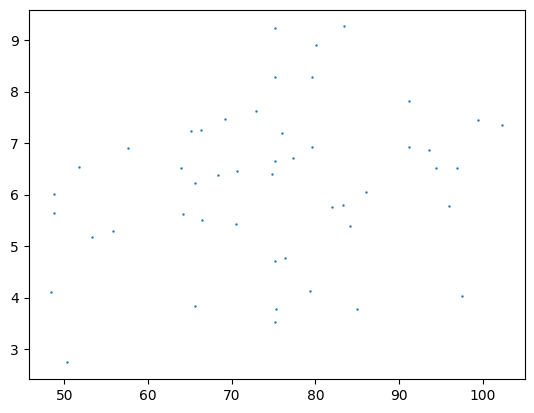

In [47]:

plt.scatter(final_table['Heart Rate (BPM)'], final_table['Sleep Duration (hours)'], s = 0.5)


**Question 14**: 


Read in the CSV table where we kept all the NaN values instead of removing or imputing them. Repeat the exact same visualization as above with this data. 

Compare the two figures. What do you notice?

ANSWER: When I set s = 10, I couldn't really see anything about the data except a huge blue blob. Making s smaller made the true center of the data more clear.

...

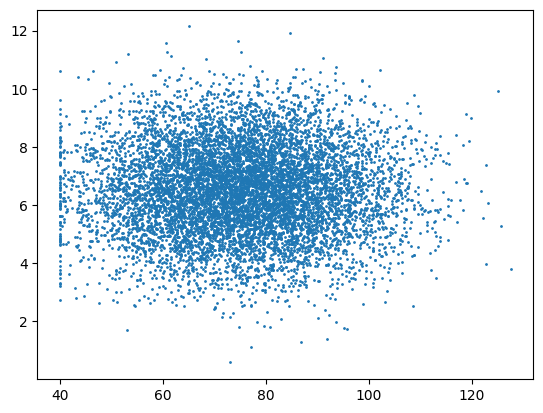

In [51]:
nanTable = pd.read_csv('smartwatch_nan_vals.csv')

plt.scatter(nanTable['Heart Rate (BPM)'], nanTable['Sleep Duration (hours)'], s = 1)
plt.show()

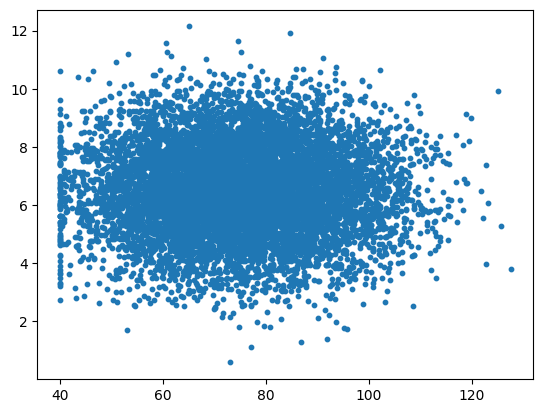

In [52]:
plt.scatter(nanTable['Heart Rate (BPM)'], nanTable['Sleep Duration (hours)'], s = 10)

**Question 15**: 


Does the amount of steps signficantly differ between the different activity level groups? 
Surprisingly, no! 

Hint: Try using a boxplot (`sns.boxplot`) to first visualize the problem. Then you can use scipy.stats to run an ANOVA. 

<Axes: xlabel='Activity Level', ylabel='Step Count'>

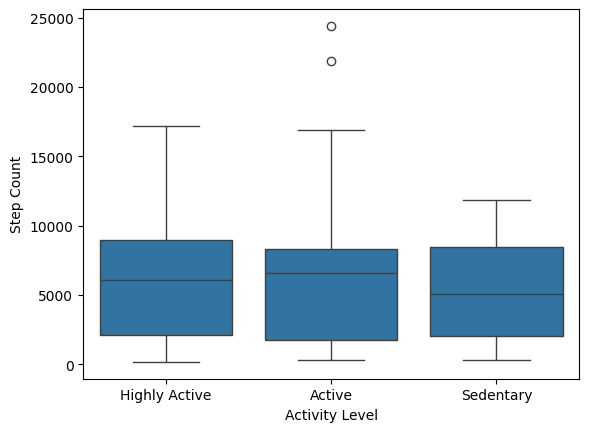

In [54]:
## Visualization 

sns.boxplot(x = final_table['Activity Level'], y = final_table['Step Count'])


In [59]:
from scipy.stats import f_oneway

## create a table for each activity level group
sed = final_table[final_table['Activity Level'] == 'Sedentary']['Step Count']  ## sedentary rows
act = final_table[final_table['Activity Level'] == 'Active']['Step Count']  ## active rows
hact = final_table[final_table['Activity Level'] == 'Highly Active']['Step Count']  ## highly active rows 

stat, pval = f_oneway(sed, act, hact)


print(f"ANOVA test statistic: {stat:.3f}, p-value: {pval:.3f}")


ANOVA test statistic: 0.989, p-value: 0.380


Is there significant difference between the groups' step counts?  

ANSWER: No, there is not a significant difference between the groups' step counts (because the p-value is > 0.05)

...

**Question 16**

If you were to present your findings from this dataset to a broader audience (such as policymakers, healthcare providers, or the general public), how would you communicate key insights responsibly? What considerations would you take into account to avoid misrepresenting the data or reinforcing biases?

ANSWER: Keeping good documentation of any changes and publishing them with the data is important to ensure our results are reproducible. It would be important to report any changes we made to the dataset and why we made those changes. For example, acknowledging null or error values and out of range values. We can talk about how we coverted them into a usable form for the analysis, but understanding how many values weren't collected can give us important information about the efficacy of the health monitoring device. I would also make it clear what each variable we're measuring means and how we get it - for example, acknowledging that "Activity Level" is self-reported and not directly related to step count. I would like to consult the scientists behind the montioring device about the null and outlier data and see if they can provide context for those missing points. And, we need to be VERY CLEAR about mean imputation and how that might influence the statistics we report.

We should also make sure visualizations of data are clear and not misleading - in particular, smaller dots for scatterplots (and more things we will discuss later)